<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/finance/%EA%B8%88%EC%9C%B5_%EA%B3%B5%ED%95%99_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/b89cU3/btrwfdvv0Md/kyIedPKHK4lMsMxpCnuQnK/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bzIXuu/btrwgE0nl5M/ZAloxkpxsF0zDMRwXKou2K/img.png" /><br>
# CD
* 양도성예금증서 (양도가능-매매가능)
* 양도가능 : 발행 은행에서 관리차원으로 누가 샀는지만 확인-> 말일에 누구의 소유인지 상관X

# 단기금리
* 콜금리/CD/CP

## 어음
* 물건 대금값(지불해야할 값)을 현금이 아닌 증서(어음)로 주는 것
* 일정 기간 후(지정일)에 은행에서 대금 수령
* 위험도가 높음 (기업파산위험)

# CP(어음금리)
* 대금값은 1000만이지만 어음으로 결제하면 일정 금리(CP)를 추가하여 발행 (미래에 수령하니까)
* 1달후에 1100만원 이때 어음금리(CP)는 10%
* 단기거래 형태는 91일 상품이 많음 <91일후 수령>



<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/b2phAp/btrweymnrf1/5tGdtBbzUgqokzbD4m07Xk/img.png" /><br>


<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/elOQ1T/btrweyNlEgA/spv4dk5TuRc9XC8gKKORnK/img.png" /><br>

##고정금리
* 대표적으로 금융채금리
* 변동X 일정함

##변동금리
* 대표적으로 주택담보대출금리
* 집값 5억 1%-> 집값 10억 2%

## 고정금리 vs 변동금리
* 대출 시 경제상황이 금리 지속 하락세 -> 변동금리 유리
* 대출 시 경제상황이 금리 지속 상승세 -> 고정금리 유리

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/cDg5D0/btrwk4J8beJ/WTC6SbJWfvmujQO3y7xifK/img.png" /><br>
# 기준금리 떨어지는데 대출금리, 국채금리 상승
* 링크 : https://www.ytn.co.kr/_ln/0102_201910301518564398
* 이유 : 기준금리를 낮춰도 은행채 남발 -> 채권 만기시 은행에서 돈 더 줘야함 -> 대출금리 상승

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bkPXPs/btrwgj97zNe/xcvjXkZeNTr0lksydDgD3k/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/ckNARp/btrweyUbXGf/hAHMak3rrBRJfYEHLjjxn0/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/KtGRj/btrwk44tGMd/kG15BdSIrCYKfxj3W2AnaK/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/xIbvU/btrwhdVQvKO/dKFrpwnvUvu4vmmxsvx82k/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bNljqi/btrwfbR4f8Q/Us1FM5ZW4CO60femYFB0O1/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/dRuwpc/btrwgEsAfMr/zBPjKOK5VvfREC5b5tymiK/img.png" /><br>

<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bH3eB1/btrwkvOCL1B/GIToQjXywETziBNhqa8I5k/img.png" /><br>

# 평균
* ref : https://namu.wiki/w/%ED%8F%89%EA%B7%A0



<font size=6><b>금리 & 채권</b></font>
* ref [2021년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10063199&menuNo=200690&pageIndex=1
* ref [2022년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10069319&menuNo=200690
* ref : https://www.ytn.co.kr/_ln/0102_201910301518564398
* ref [ECOS] : http://ecos.bok.or.kr/flex/ClassSearch.jsp

In [70]:
pip install QuantLib

In [71]:
import pandas as pd
import numpy as np
import QuantLib as ql
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

In [72]:
# colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 통화 및 유동성 지표

* <b>본원통화 (本源通貨, Reserve Base , monetary base 또는 base money) : 중앙은행 화폐발행액, 시중은행으로 보낸 돈
  - 현금통화<한국은행이 갖고있는 돈> + 예금은행시재금<시중은행이 갖고있는 돈> + 중앙은행 지급준비예치금<뱅크런 막기 위한 최소한의 예치금><br>
* 시장에 풀린 본원통화는 크게 다음 두가지 방식으로 유통된다.
   - <b>현금통화 </b> : 현금의 형태로 실제 시장에 풀려 유통
   - <b>지급준비금</b> : 시중은행으로 흘러들어가는 돈      

* 통화지표 <br>
   (예) 초기에 10일은 4만원 입금,  이 후 20일은 6만원 입금
  - <b>평잔</b> : ( ( 40,000 * 10일 ) + ( 60,000 * 20일 ) ) / 30일 = 80,000원
  - <b>말잔</b> : 10만원
  - 은행이자는 평잔 기준
  - 통상적으로는 평잔보다 말잔이 높다
 <table>
    <tr>
        <td><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcZmxkR%2FbtqUeiF5uad%2FNk4LaGuEczfLzPYlsh0rJK%2Fimg.png'></td>
        <td><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Few5rPj%2FbtqUeXhn0Ih%2F7fbSacPBHtreGVgdGF2MfK%2Fimg.png'></td>
    </tr>
</table>
* M1 (협의통화) : 가계 소비내역
* M2 (광의통화> : 시중에 돈이 얼마나 풀려 있는지를 보여주는 지표 
* Lf (금융기관 유동성) : 금융기관 금융채 유동성 
* L (광의 유동성) : 정부나 기업 유동성          
<img  width="700" height="400" src="https://blog.kakaocdn.net/dn/bRnYpp/btrwhU20pIf/xHuGLuUlAL7TGvbIS2JNyK/img.png" /><br>
* ecos를 통해 통화지표/유동성지표 통계량 확인 가능 <기관별/경제주체별>

# 금리 

In [73]:
#ecos 본원통화/현금통화/중앙은행 대 예치금부채
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/금융공학/dataset/f2_금리.csv', encoding='cp949') 
df.head()

,통계표,"1.2.1.2 본원통화 구성내역(말잔,원계열)","1.2.1.2 본원통화 구성내역(말잔,원계열).1","1.2.1.2 본원통화 구성내역(말잔,원계열).2"
0,항목명1,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
1,단위,십억원,십억원,십억원
2,변환,원자료,원자료,원자료
3,2002,"37,987.4","18,228.1","19,759.3"
4,2003,"40,749","17,347.8","23,401.2"


In [74]:
#멀티컬럼 병합
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/금융공학/dataset/f2_금리.csv', encoding='cp949', header=[0,1,2,3], thousands=',') 

In [75]:
df.head()

통계표 1.2.1.2 본원통화 구성내역(말잔,원계열)                         
   항목명1              본원통화(말잔,원계열)     현금통화 중앙은행 대 예금취급기관부채
     단위                      십억원      십억원             십억원 
     변환                       원자료      원자료             원자료
0  2002                  37,987.4  18228.1         19759.3
1  2003                    40,749  17347.8         23401.2
2  2004                  38,791.8  19206.8         19585.0
3  2005                    43,249  20412.3         22836.7
4  2006                  51,869.5  21636.1         30233.4

In [76]:
df.tail()

통계표 1.2.1.2 본원통화 구성내역(말잔,원계열)  \
                                           항목명1              본원통화(말잔,원계열)   
                                             단위                      십억원    
                                             변환                       원자료   
19                                         2021                 248,785.5   
20                      1) 1.2.1.2 본원통화 구성내역(말잔                      원계열)   
21         통계담당 : 한국은행 경제통계국 금융통계팀(02-759-4310)                       NaN   
22  주 : 1) 본원통화 = 현금통화 + 중앙은행의 대 예금취급기관 부채 등(RP                통화안정증권 제외)   
23                                  2) 최종월은 잠정치                       NaN   

                              
        현금통화 중앙은행 대 예금취급기관부채  
        십억원             십억원   
         원자료             원자료  
19  156264.2         92521.4  
20       NaN             NaN  
21       NaN             NaN  
22       NaN             NaN  
23       NaN             NaN

In [77]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/금융공학/dataset/f2_금리.csv', encoding='cp949', header=[0,1,2,3], thousands=',',skipfooter=5) 

In [78]:
df.tail()

통계표 1.2.1.2 본원통화 구성내역(말잔,원계열)                          
    항목명1              본원통화(말잔,원계열)      현금통화 중앙은행 대 예금취급기관부채
      단위                      십억원       십억원             십억원 
      변환                       원자료       원자료             원자료
15  2017                  155881.0   96842.8         59038.2
16  2018                  172353.3  103994.8         68358.5
17  2019                  191829.3  114523.9         77305.4
18  2020                  221503.7  136152.6         85351.1
19  2021                  248785.5  156264.2         92521.4

In [79]:
df.columns = df.columns.droplevel([0,2,3])
df.head()

,항목명1,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
0,2002,37987.4,18228.1,19759.3
1,2003,40749.0,17347.8,23401.2
2,2004,38791.8,19206.8,19585.0
3,2005,43249.0,20412.3,22836.7
4,2006,51869.5,21636.1,30233.4


In [80]:
df['항목명1']=pd.to_datetime(df['항목명1'],format='%Y').dt.year

In [81]:
df=df.set_index('항목명1')
df.head()

,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
항목명1,,,
2002,37987.4,18228.1,19759.3
2003,40749.0,17347.8,23401.2
2004,38791.8,19206.8,19585.0
2005,43249.0,20412.3,22836.7
2006,51869.5,21636.1,30233.4


In [82]:
df.head()

,"본원통화(말잔,원계열)",현금통화,중앙은행 대 예금취급기관부채
항목명1,,,
2002,37987.4,18228.1,19759.3
2003,40749.0,17347.8,23401.2
2004,38791.8,19206.8,19585.0
2005,43249.0,20412.3,22836.7
2006,51869.5,21636.1,30233.4


In [83]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

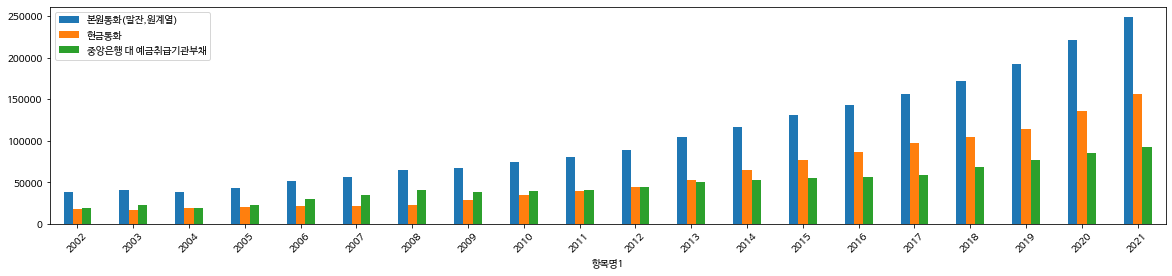

In [84]:
df.plot(kind='bar', figsize=(20,4))
plt.xticks(rotation=45)
plt.show()

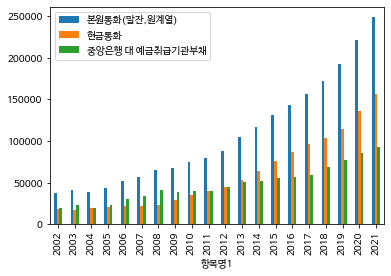

In [85]:
df[["본원통화(말잔,원계열)", "현금통화", "중앙은행 대 예금취급기관부채"]].plot.bar()

* 금융차트 패키지 mplfinance / cufflinks / plotly / plotly express
* https://chart-studio.plotly.com

## 기준금리
* 금리 체계의 기준이 되는 금리
* 환율 분석할 때 각 국가별 기준금리 확인 (대외적 기준금리)
* 기준금리가 낮아지면 대출 증가


In [86]:
#-------주요 국가 금리 비교 ------------ 미국, 일본, 한국

In [119]:
df2=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/금융공학/dataset/국제금리.csv', encoding='cp949', header=[0,1,2,3],skipfooter=8) 
df2.columns = df2.columns.droplevel([0,2,3])
df2.head()

,항목명1,한국,중국,일본,미국
0,2012/02,3.25,6.56,0.05,0.125
1,2012/03,3.25,6.56,0.05,0.125
2,2012/04,3.25,6.56,0.05,0.125
3,2012/05,3.25,6.56,0.05,0.125
4,2012/06,3.25,6.31,0.05,0.125


In [120]:
df2=df2.set_index('항목명1')

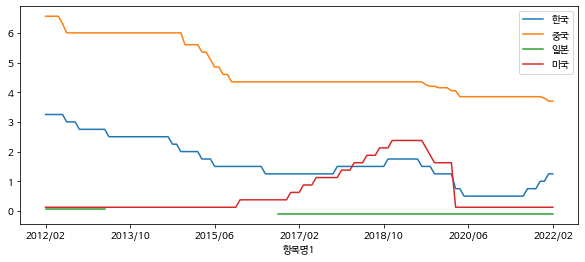

In [121]:
df2.plot(kind='line', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

* 한국과 중국이 기준금리 추세가 거의 똑같음 -> 시차 때문에
* 일본 기준금리 데이터가 중간에 누락 -> 0% 이하로 떨어짐

## 시장금리

* <b>COFIX</b>(Cost of Funds Index): 8개 은행의 자금조달 관련 정보를 기초로 산출되는 자금조달비용지수
* <b>KORIBOR</b> : 은행간 만든 단기 기준금리
* 단기투자상품 CD, CP, RP
  - <b>CD</b>(Certificate of Deposit) : 양도성예금증서 / 은행발행->은행
  - <b>CP</b>(Commercial Paper) : 기업어음 / 기업발행->금융기관->고객
  - CP와 회사채의 차이 : CP는 단기목적(1년미만) 회사채는 3년 이상
  - <b>RP</b>(Repurchase Agreements) : 환매조건부채권 
  -<img  width="900" height="400" src="https://blog.kakaocdn.net/dn/bvkcnI/btrwlQ59Tam/kBSJkX3mgru8zvMutAdi2k/img.png" /><br>
  

In [115]:
df3=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/금융공학/dataset/국내금리.csv', encoding='cp949', header=[0,1,2,3],skipfooter=27) 
df3.columns = df3.columns.droplevel([0,2,3])
df3=df3.set_index('항목명1')
df3.tail()

,한국은행 기준금리,CD(91일),CP(91일),환매조건부채권매도(91~180일),국고채(1년),국고채(5년),국고채(10년),기업대출 2),가계대출 2),저축성수신
항목명1,,,,,,,,,,
2021/10,0.75,1.08,1.20,1.19,1.178,2.154,2.399,2.91,2.86,1.29
2021/11,1.00,1.17,1.34,1.31,1.339,2.174,2.355,3.00,2.93,1.57
2021/12,1.00,1.27,1.54,1.48,1.320,1.981,2.187,3.07,3.01,1.70
2022/01,1.25,1.39,1.60,1.58,1.422,2.279,2.492,3.15,3.09,1.65
2022/02,1.25,1.50,1.64,NaN,1.480,2.495,2.690,NaN,NaN,NaN


In [110]:
df3.columns

Index(['한국은행 기준금리', 'CD(91일)', 'CP(91일)', '        환매조건부채권매도(91~180일)',
       '국고채(1년)', '국고채(5년)', '국고채(10년)', '    기업대출 2)', '    가계대출 2)',
       '  저축성수신'],
      dtype='object')

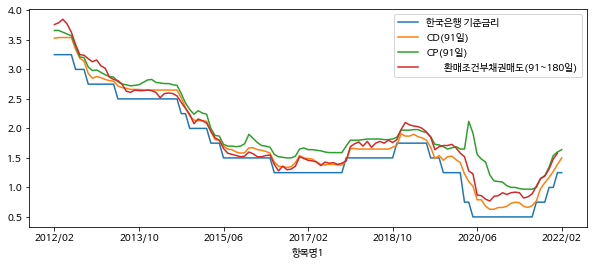

In [118]:
# 기준금리에 따른 단기투자상품 금리 (CD, CP, RP)

df3[['한국은행 기준금리', 'CD(91일)', 'CP(91일)', '        환매조건부채권매도(91~180일)']].plot(kind='line', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

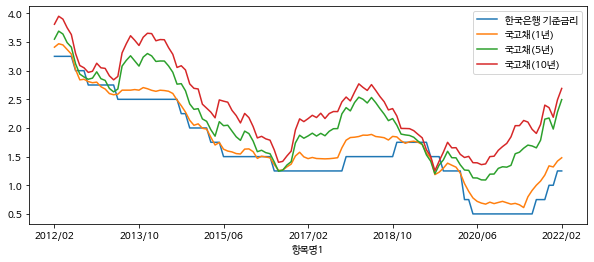

In [117]:
# 기준금리에 따른 국고채 금리

df3[['한국은행 기준금리','국고채(1년)','국고채(5년)','국고채(10년)']].plot(kind='line', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

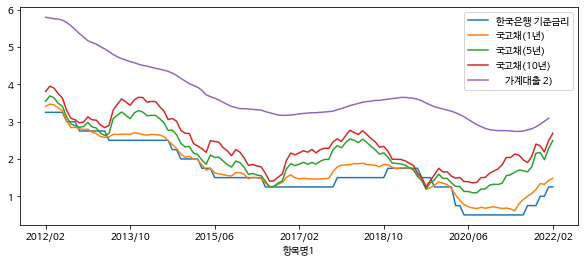

In [124]:
# 기준금리에 따른 국고채 금리

df3[['한국은행 기준금리','국고채(1년)','국고채(5년)','국고채(10년)','    가계대출 2)']].plot(kind='line', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

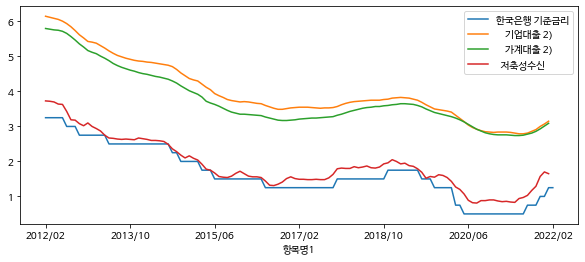

In [122]:
# 기준금리에 따른 정기예금 금리
df3[['한국은행 기준금리','    기업대출 2)', '    가계대출 2)','  저축성수신']].plot(kind='line', figsize=(10,4))
plt.xticks(rotation=0)
plt.show()

In [95]:
#-------시장 금리 비교 ------------ CD/CP 3개월, RP 3개월 + 기준금리, 가능하면 채권(단기성[1~2년] 예금/채권,중기성[2~] 예금, 10년 채권)

In [96]:
# () 중앙은행의 기준금리 변화에 대한 시중은행의 예금금리와 대출금리의 비대칭적 변동을 실증 분석
# https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002530569
        